## Analysis

In [38]:
# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [39]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5E94-16FB

 Directory of C:\Users\wnaiy\OneDrive\Desktop

07/30/2023  11:09 AM    <DIR>          .
07/24/2023  07:25 PM    <DIR>          ..
07/30/2023  10:44 AM    <DIR>          .ipynb_checkpoints
07/27/2023  09:58 PM    <DIR>          __pycache__
07/27/2023  01:42 PM    <DIR>          csvfiles
07/30/2023  10:41 AM             7,976 Mouse_metadata.csv
07/30/2023  10:40 AM    <DIR>          notes
07/30/2023  11:09 AM            50,195 Pymaceuticals.ipynb
07/10/2023  02:42 PM             2,218 Slack.lnk
07/24/2023  03:12 PM    <DIR>          Starter_Code
07/30/2023  10:41 AM            40,640 Study_results.csv
07/10/2023  06:30 PM             1,417 Visual Studio Code.lnk
07/06/2023  05:54 PM             1,944 Zoom.lnk
               6 File(s)        104,390 bytes
               7 Dir(s)  427,745,222,656 bytes free


In [40]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [41]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merged_data.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [42]:
merged_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [43]:
# Checking the number of mice.
num_unique_mice = len(merged_data["Mouse ID"].unique())
print("Number of unique mice IDs:", num_unique_mice)

Number of unique mice IDs: 249


In [44]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]['Mouse ID'].unique()
print("Mouse ID with duplicate time points:", duplicate_mouse_id)

Mouse ID with duplicate time points: ['g989']


In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
cleaned_data = merged_data[merged_data["Mouse ID"] != duplicate_mouse_id[0]]
num_unique_mice_cleaned = len(cleaned_data["Mouse ID"].unique())
print("Updated number of unique mice IDs:", num_unique_mice_cleaned)

Updated number of unique mice IDs: 248


## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
print(summary_statistics)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
).reset_index()

# Using the aggregation method, produce the same summary statistics in a single line
print(summary_statistics)

  Drug Regimen       Mean     Median   Variance  Standard_Deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013            6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie charts

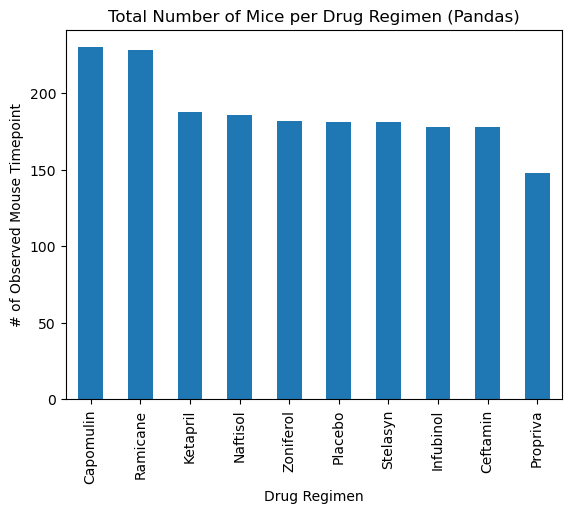

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pandas = cleaned_data["Drug Regimen"].value_counts().plot(kind='bar', title='Total Number of Mice per Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.show()

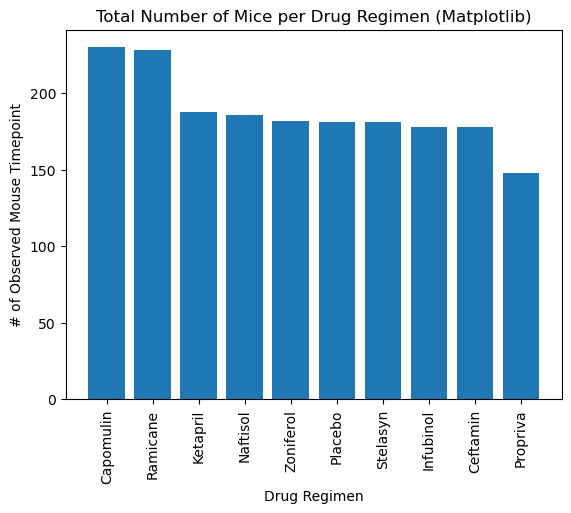

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart_matplotlib = plt.bar(cleaned_data["Drug Regimen"].value_counts().index, cleaned_data["Drug Regimen"].value_counts())
plt.title('Total Number of Mice per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.xticks(rotation=90)
plt.show()

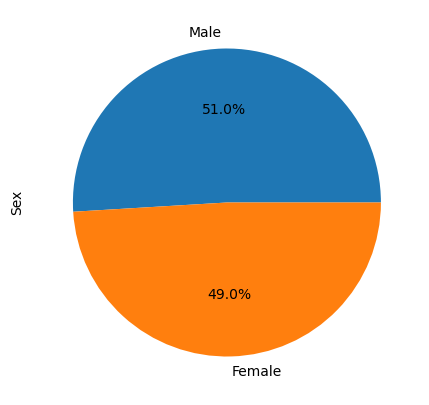

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(figsize=(5, 5))
cleaned_data["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

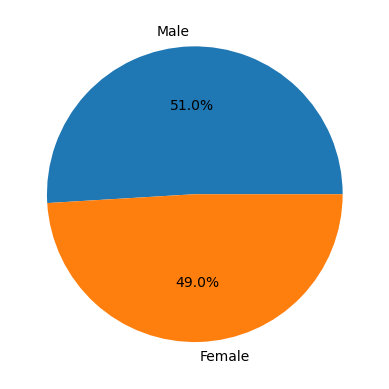

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart_matplotlib = plt.pie(cleaned_data["Sex"].value_counts(), labels=cleaned_data["Sex"].value_counts().index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_treatment_data = cleaned_data[cleaned_data["Drug Regimen"].isin(top_treatments)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_data = top_treatment_data.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(final_timepoint_data, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = cleaned_data["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = cleaned_data.loc[cleaned_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Potential outliers: {outliers}\n")


Treatment: Ramicane
IQR: 8.325365415
Potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Treatment: Capomulin
IQR: 7.314067135000002
Potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Treatment: Infubinol
IQR: 10.002090667500006
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Placebo
IQR: 12.457881529999995
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ceftamin
IQR: 9.593010457500007
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Stelasyn
IQR: 10.67215848
Potential outliers: 1179    75.12369
Name: Tumor Volume (mm3), dtype: float64

Treatment: Zoniferol
IQR: 10.616382797500002
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ketapril
IQR: 12.637963814999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Propriva
IQR: 9.597257012500002

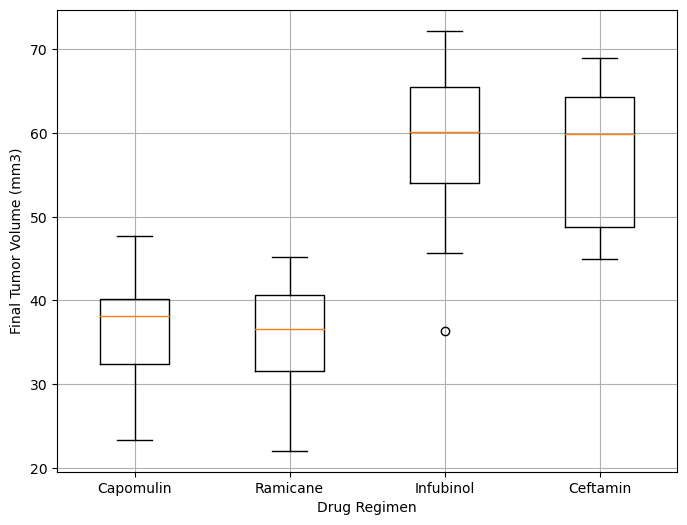

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot([final_tumor_volume_data[final_tumor_volume_data["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in top_treatments],
            labels=top_treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Line and Scatter Plot

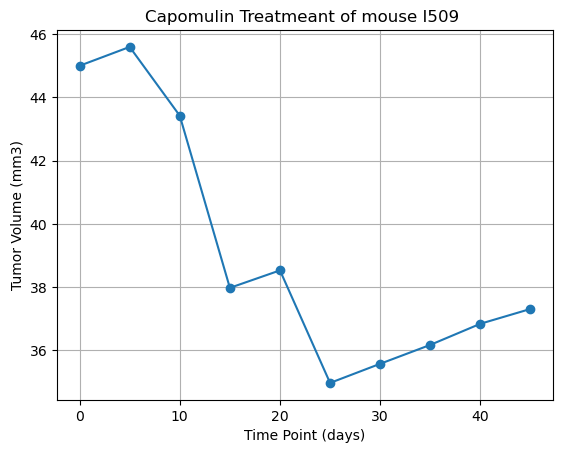

In [102]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].sample().values[0]
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Capomulin Treatmeant of mouse I509 ")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

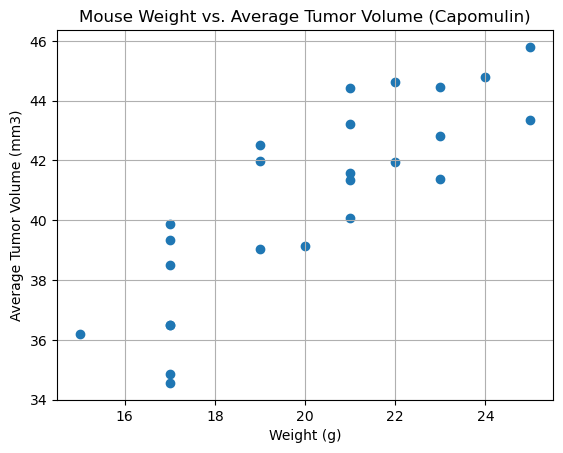

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_grouped = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation between mouse weight and average tumor volume: 0.8419363424694722


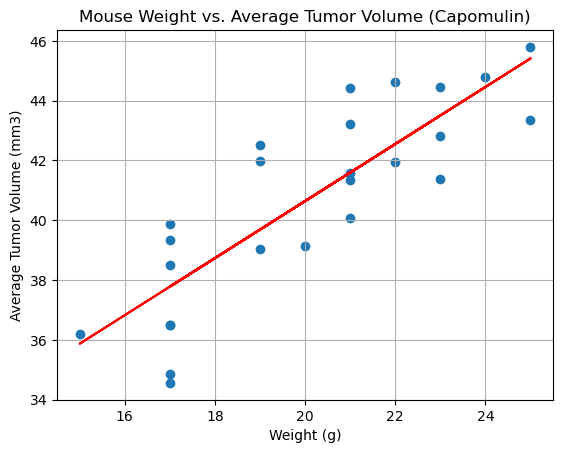

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation = capomulin_grouped["Weight (g)"].corr(capomulin_grouped["Tumor Volume (mm3)"])
print("Correlation between mouse weight and average tumor volume:", correlation)

plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
plt.plot(x_values, y_regression, color="red", label=f"Regression Line (Correlation: {correlation:.2f})")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()